# Beispiel 4.3: Gleichgewicht bei adiabatischer Reaktion

Bearbeitet von Marcel Broocks 

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 45 - 46 und behandelt die Ammoniaksynthese: $\mathrm{N}_2 + 3\,\mathrm{H}_2 \longrightarrow 2\,\mathrm{NH}_3$. Dabei entspricht die Nummerierung der verwendeten Gleichungen der des Lehrbuchs. Der nachfolgende Lösungsvorschlag lässt sich in folgende Schritte unterteilen:

1. Berechnung der Gleichgewichtskonstanten $K_{\mathrm{x}}(T)$ bei den Drücken $p_1 = 100$ bar, $p_2 = 200$ bar und $p_3 = 300$ bar (vgl. Lehrbuchbeispiel 4.2).
2. Gleichsetzen von $K_{\mathrm{x}}(T)$ mit den Stoffmengenanteilen der an der Reaktion beteiligten Komponenten unter Zunahme der Anfangsstoffmengen $n_{i,0}$ zur Bestimmung der Reaktionslaufzahl $\xi(T)$ (vgl. Lehrbuchbeispiel 3.3).
3. Berechnung des Gleichgewichtsumsatzgrades $U(T)$ aus der Reaktionslaufzahl.
4. Berechnung der adiabatischen Temperaturdifferenz $\Delta T_{\mathrm{ad}}$ und Schnittpunktbestimmung zwischen dem Gleichgewichtsumsatzgrad und dem adiabatischen Temperaturpfad.

# Importieren der benötigten Pakete
Bevor mit der Berechnung gestartet werden kann, müssen zur Bearbeitung des Beispiels folgende Pakete importiert werden:

- numpy
    - Zur Durchführung von numerischen Operationen und zum Arbeiten mit Arrays
    - Informationen unter https://numpy.org/doc/stable/reference/routines.array-creation.html
- matplotlib
    - Zum Erstellen von Grafiken
    - Informationen unter https://matplotlib.org/stable/tutorials/introductory/index.html
- scipy
    - Zur Durchführung wissenschaftlicher Rechnungen (hier zur Lösung von Integralen mit quad)
    - Informationen unter https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
- fsolve
    - Zur Berechnung von Nullstellen 
    - Informationen unter https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html

In [1]:
# Importieren der benötigten Pakete 
import numpy as np                           # numerische Rechenoperationen
import matplotlib.pyplot as plt              # Allgemein für Diagramme 
from scipy.integrate import quad             # Integration
from scipy.optimize import fsolve            # Nullstellenbestimmung 
from matplotlib.ticker import FuncFormatter  # Achsenbeschriftung 

# Schritt 1: Berechnung der Gleichgewichtskonstanten $K_x(T)$

Zur Berechnung von $K_{\mathrm{x}}(T)$ kann der Lösungsvorschlag für das Beispiel 4.2 herangezogen werden (https://github.com/tuc-icvt/lcrt-examples/blob/main/Kapitel%2004/Beispiel%204.2.ipynb). Der Vollständigkeit halber wird hier der alternative Lösungsweg über die **GIBBS-HELMHOLTZ-Beziehung** nach Gl. (4.9): 
$$
\Delta_{\mathrm{R}}G^{\ominus}(T) = \Delta_{\mathrm{R}}H^{\ominus}(T) - T \, \Delta_{\mathrm{R}}S^{\ominus}(T)
$$
vorgestellt, welche sich aus den Gleichungen (4.4) und (4.10) des Lehrbuchs ergibt. Dafür werden zunächst die Tabellenwerte für die Bildungsenthalpien $\Delta_{\mathrm{f}}H_i^{\ominus}$, die Entropien $S_i^{\ominus}$ sowie für die Wärmekapazitäten $c_{\mathrm{p,}i}$ benötigt, die sich dem NIST Chemistry WebBook entnehmen lassen. In der nachfolgenden Tabelle sind diese für $T^{\ominus}$ aufgeführt:
$$
\begin{array}{c|ccc}
\text{Spezies} & \mathrm{N_2} & \mathrm{H_2} & \mathrm{NH_3} \\
\hline
\Delta_{\mathrm{f}}H_i^{\ominus}\ /\ \mathrm{kJ\ mol^{-1}} & 0 & 0 & -45{,}90 \\
\Delta S_i^{\ominus}\ /\ \mathrm{J\ mol^{-1}\ K^{-1}} & 191{,}61 & 130{,}68 & 192{,}77 \\
c_{\mathrm{p,}i}\ /\ \mathrm{J\ mol^{-1}\ K^{-1}} & 29{,}12 & 28{,}84 & 35{,}64 \\
\nu_i\ /\ - & -1 & -3 & 2 \\
\end{array}
$$

Anschließend können die Enthalpie, Entropie und Wärmekapazität der Reaktion mithilfe der Tabellenwerte über Gl. (4.1), (4.5) und (4.11), ähnlich wie auch in Beispiel 4.2 analog beschrieben, bestimmt werden. Die Umrechnung auf die gewünschte Temperatur T erfolgt mittels des **KIRCHHOFFschen Gesetzes** unter Berücksichtigung der **2. ULICHschen Näherung** ($\Delta_{\mathrm{R}}c_{\mathrm{p}} = \mathrm{const}$.) sowie der Vernachlässigung latenter Wärmen beim Übergang von $T_{\mathrm{ref}}$ zu $T$ ($\Delta_{\mathrm{L}}H^{\ominus} = 0$). Dazu werden die Gleichungen (4.4) sowie (4.10) verwendet. Analog zum Lösungsvorschlag für das Beispiel 4.2 kann nach Bestimmung der freien Standardreaktionsenthalpie $\Delta_{\mathrm{R}}G^{\ominus}(T)$ mithilfe von Gl. (4.12) die Gleichgewichtskonstante $K^{\ominus}(T)$ ermittelt werden, aus der sich über Gl. (4.13) und Gl. (4.14) wiederum $K_{\mathrm{x}}(T)$ berechnen lässt. 

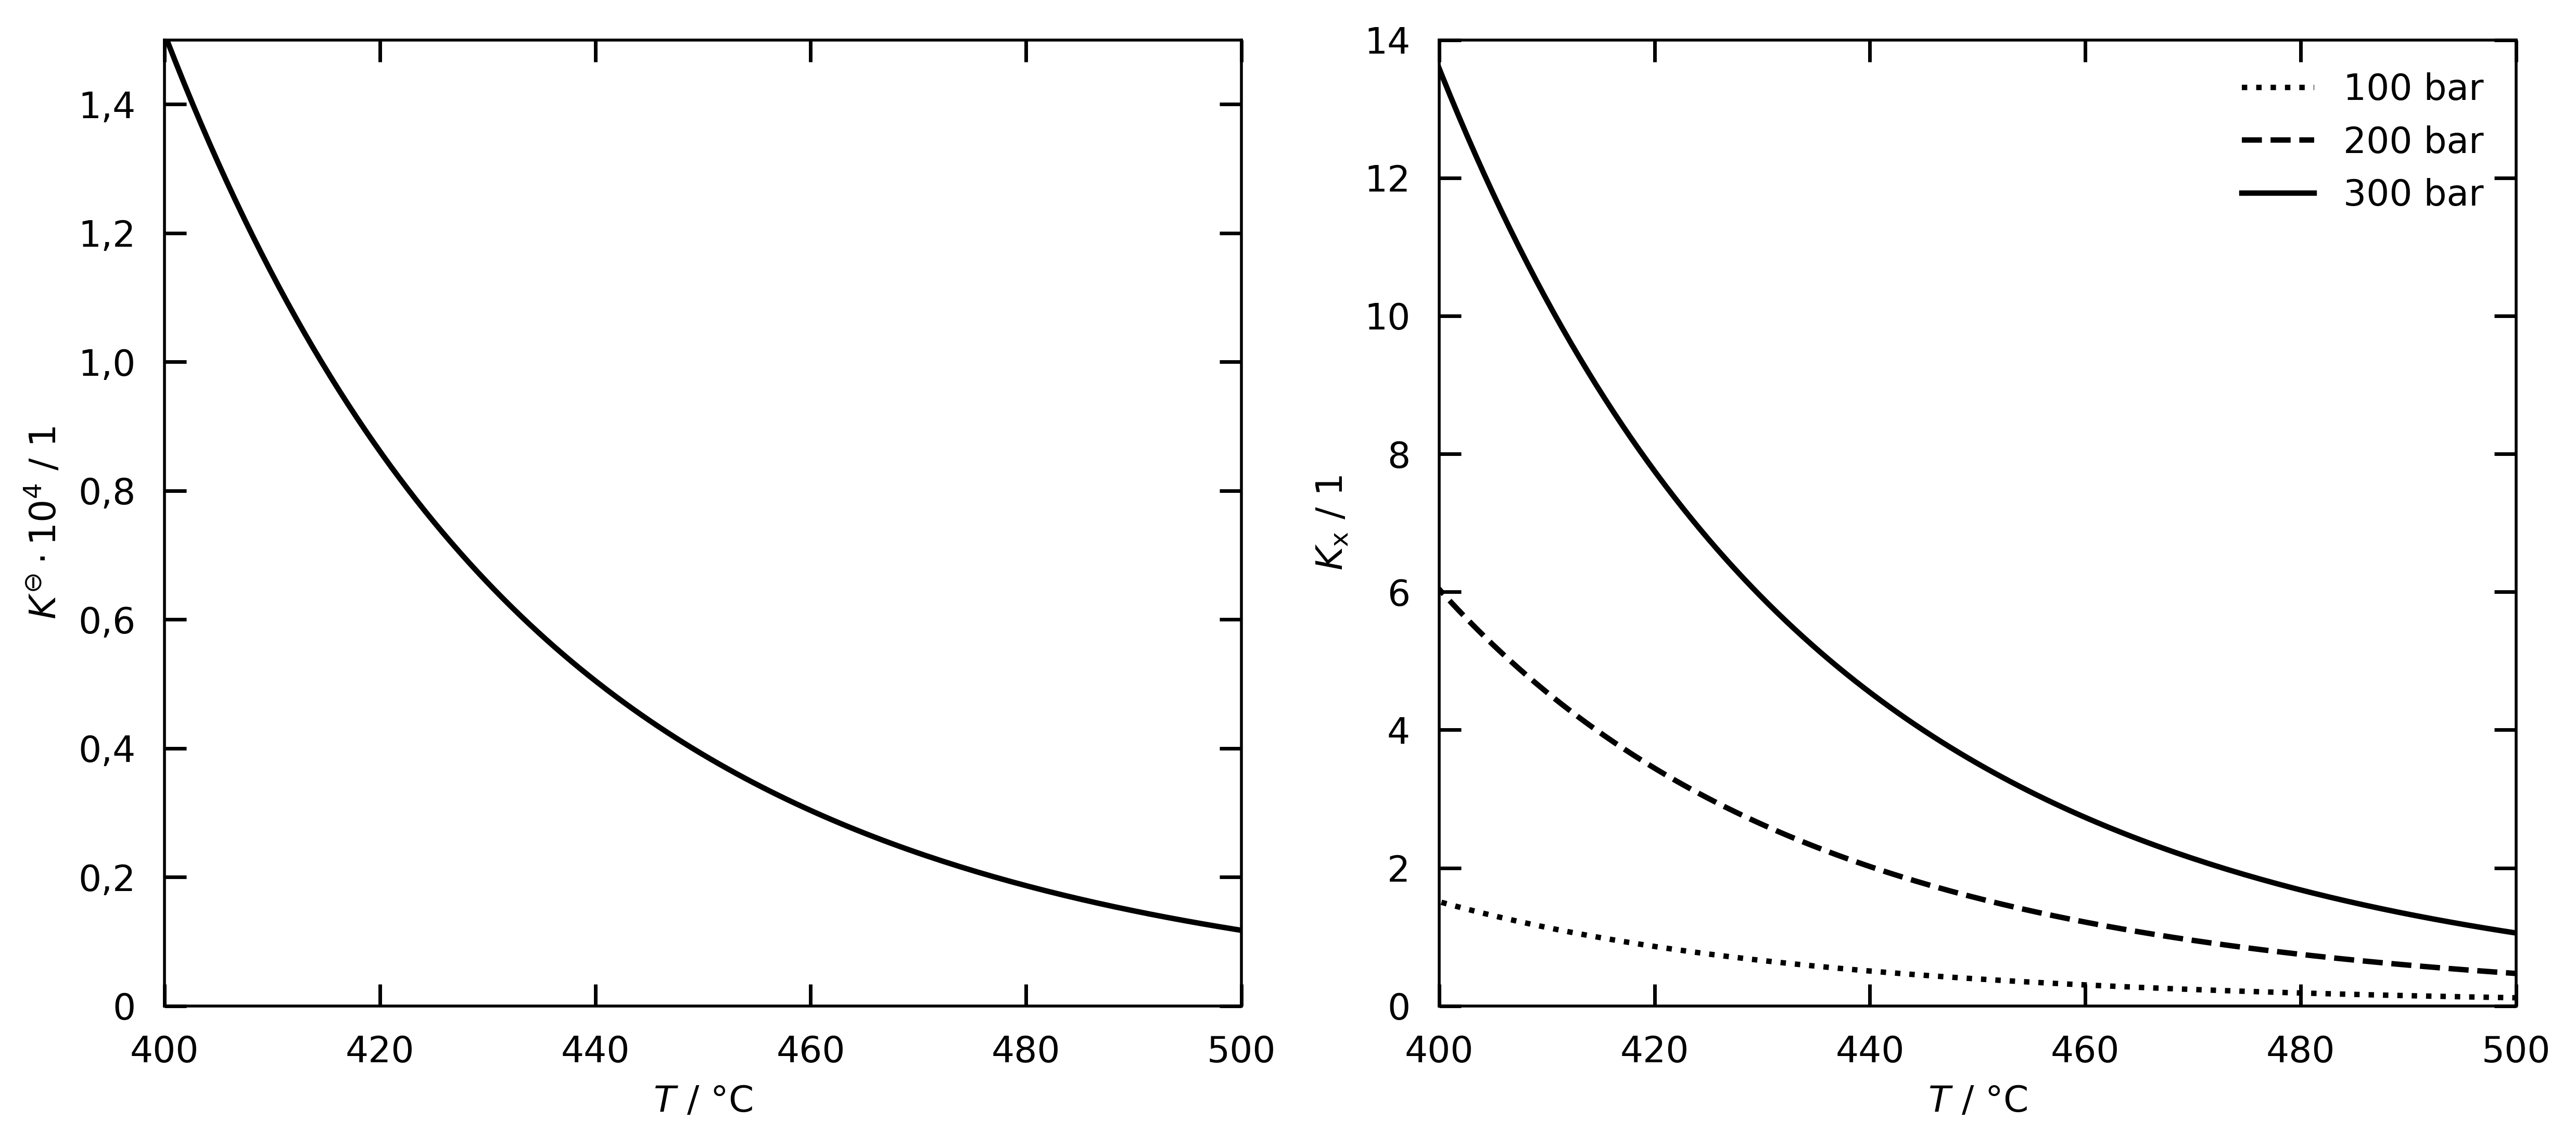

In [2]:
# Konstanten, Referenzen
R = 8.314                                  # universelle Gaskonstante / J mol^-1 K^-1
p_ref = 1                                  # Referenzdruck: 1 bar 
T_ref = 298.15                             # Referenztemperatur: 298.15 K = 25 °C 
T0 = 250                                   # Starttemperatur / °C

# Temperaturbereich
Stellen = 1000                             # Anzahl der Diskrete (Berechnungsstellen)
Temp = np.linspace(200 + 273.15, 1000 + 273.15, Stellen)

# Drücke / bar
p_array = np.array([100, 200, 300])

# Tabellendaten als Matrix
# Spalten: N2, H2, NH3
M = np.array([
    [0,       0,     -45.90],              # Enthalpie
    [191.61, 130.68, 192.77],              # Entropie
    [29.12,  28.84,  35.64],               # Wärmekapazität
    [-1,     -3,      2]                   # st. Koeffizient 
])

# Reaktionsgrößen berechnen
# Zeilenindex entsprechend der Matrix
Delta_RH0 = np.sum(M[0] * M[3]) * 1e3
Delta_S0  = np.sum(M[1] * M[3])
Delta_Rcp = np.sum(M[2] * M[3])

# Kirchhoffsche Gesetze (Integration mit quad)
def integrand_h(T):
    return Delta_Rcp                    
def integrand_s(T):
    return Delta_Rcp / T
# Arrays für Ergebnisse
Delta_RH_var = np.zeros_like(Temp)
Delta_S_var  = np.zeros_like(Temp)
for i, T in enumerate(Temp):
    Delta_RH_var[i] = Delta_RH0 + quad(integrand_h, T_ref, T)[0]
    Delta_S_var[i]  = Delta_S0 + quad(integrand_s, T_ref, T)[0]  

# Gibbs-Helmholtz (Gl. (4.9))
Delta_RG_var = Delta_RH_var - Temp * Delta_S_var

# Gleichgewichtskonstanten
K0 = np.exp(-Delta_RG_var / (R * Temp))  # Gl. (4.12)

def K_x(p):
    return K0 * (p_ref / p)**(np.sum(M[3]))

# 2 Abbildungen nebeneinander plotten
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=500, figsize=(10, 4.5))
ax1.plot(Temp - 273.15, K0 * 1e4, linestyle='solid', color='k')
linestyles = ['dotted', 'dashed', 'solid']
for K_x_i, pi, ls in zip(K0, p_array, linestyles):
    ax2.plot(Temp - 273.15, K_x(pi), linestyle=ls, label=f'{pi} bar', color='k')
# Achsenbeschriftungen
ax1.set_xlabel('$T$ / °C')
ax1.set_ylabel(r'$K^{\ominus} \cdot 10^4$ / 1')
ax2.set_xlabel('$T$ / °C')
ax2.set_ylabel('$K_{\mathrm{x}}$ / 1')
# Achsenskalierung
ax1.set_xlim(400, 500)
ax1.set_ylim(0, 1.5)
ax2.set_xlim(400, 500)
ax2.set_ylim(0, 14)
# Trennzeichen auf Achse (,) 
def format_with_comma(x, pos):
    if abs(x) < 0.2:
        return '0'
    return f"{x:.1f}".replace('.', ',')
ax1.yaxis.set_major_formatter(FuncFormatter(format_with_comma))
# Achsenticks zeigen nach innen, Grid ist ausgeschaltet, Beschriftung mit Abstand zu Achsen
for ax in (ax1, ax2):
    ax.tick_params(direction='in', top=True, right=True, length=6, width=1)
    ax.grid(False)
    ax.tick_params(axis='x', pad=8)
    ax.tick_params(axis='y', pad=8)
# Legende für rechte Abbildung  
ax2.legend(loc='best', frameon=False)
plt.tight_layout()
plt.show()

Hier zeigen sich für die Drücke von $p_1 = 100$ bar, $p_2 = 200$ bar und $p_3 = 300$ bar die bereits bekannten Verläufe für die Geschwindigkeitskonstanten, die auch im Lehrbuch unter Beispiel 4.2 (Abb. 4.1) zu finden sind. 

# Schritt 2: Bestimmung der Reaktionslaufzahl $\xi(T)$

Die Bestimmung von $\xi(T)$ erfolgt unter Verwendung von Gl. (4.14): 
$$
K_{\mathrm{x}} = \prod_{i=1}^{N} x_i^{\nu_i} = \dfrac{x_{\mathrm{NH_3}}^2}{x_{\mathrm{N_2}} \, x_{\mathrm{H_2}}^3} 
$$
Weiterhin gilt für den Stoffmengenanteil für die betrachtete Komponente $i$ nach Gl. (3.4):
$$
x_i = \dfrac{n_i}{n}
$$
Die Stoffmenge $n_i$ kann mithilfe der Anfangsstoffmenge $n_{i,0}$ zum Zeitpunkt $t = 0$ über die Reaktionslaufzahl nach Gl. (3.11b) wie folgt beschrieben werden:
$$
n_i = n_{i,0} + \nu_i \, \xi
$$
Damit ist eine Gleichung für eine Unbekannte, in diesem Fall der Reaktionlaufzahl $\xi$ in mol, gegeben. Eine tabellarische Übersicht vereinfacht die Berechnungen der einzelnen Stoffmengenanteile:
$$
\begin{array}{c|c|c|c}
\text{Spezies} & n_{i,0} & n_i = n_{i,0} + \nu_i \, \xi & x_i = \dfrac{n_i}{n} \\
\hline
\text{N}_2 & 1\,\mathrm{mol} & 1\,\mathrm{mol} - \xi & \dfrac{1\,\mathrm{mol} - \xi}{3\,\mathrm{mol} - 2 \, \xi} \\
\text{H}_2 & 2\,\mathrm{mol} & 2\,\mathrm{mol} - 3 \, \xi & \dfrac{2\,\mathrm{mol} - 3 \, \xi}{3\,\mathrm{mol} - 2 \, \xi} \\
\text{NH}_3 & 0 & 2 \, \xi & \dfrac{2 \, \xi}{3\,\mathrm{mol} - 2 \, \xi} \\
\hline
\sum & 3\,\mathrm{mol} & 3\,\mathrm{mol} - 2 \, \xi & 1 \\
\end{array}
$$
Nun können die Stoffmengenanteile in Gl. (4.14) eingesetzt werden, dies führt zur nachfolgenden Gleichung
$$
K_{\mathrm{x}}(T)
- \frac{
    \left(\dfrac{2 \, \xi}{3\,\mathrm{mol} - 2 \, \xi}\right)^{2}
}{
    \dfrac{1\,\mathrm{mol} - \xi}{3\,\mathrm{mol} - 2 \, \xi}
    \cdot
    \left(\dfrac{2\,\mathrm{mol} - 3 \, \xi}{3\,\mathrm{mol} - 2 \, \xi}\right)^{3}
}
= 0,
$$
deren Nullstellen die Lösungen für $\xi(T)$ entsprechen. Diese können analog zum Lehrbuchbeispiel 3.3 gefunden werden. Alternativ kann mit der fsolve-Funktion gearbeitet werden, die einen Startwert benötigt. Hier ist es von großer Bedeutung einen plausiblen Wert zu wählen, damit die richtige Lösung für $\xi(T)$ gefunden wird. Dazu betrachten wir die Reaktionsgleichung und suchen die stöchiometrisch begrenzende Komponente. Zu Beginn der Reaktion sollen 1 mol $\mathrm{N}_2$ sowie 2 mol $\mathrm{H}_2$ vorliegen. Demnach begrenzt also der Wasserstoff den Umsatzgrad der Reaktion, da von diesem maximal 2/3 mol abreagieren können. Als Startwert für $\xi(T)$ eignet sich dann ein Wert knapp unterhalb, bspw. 0,66. 

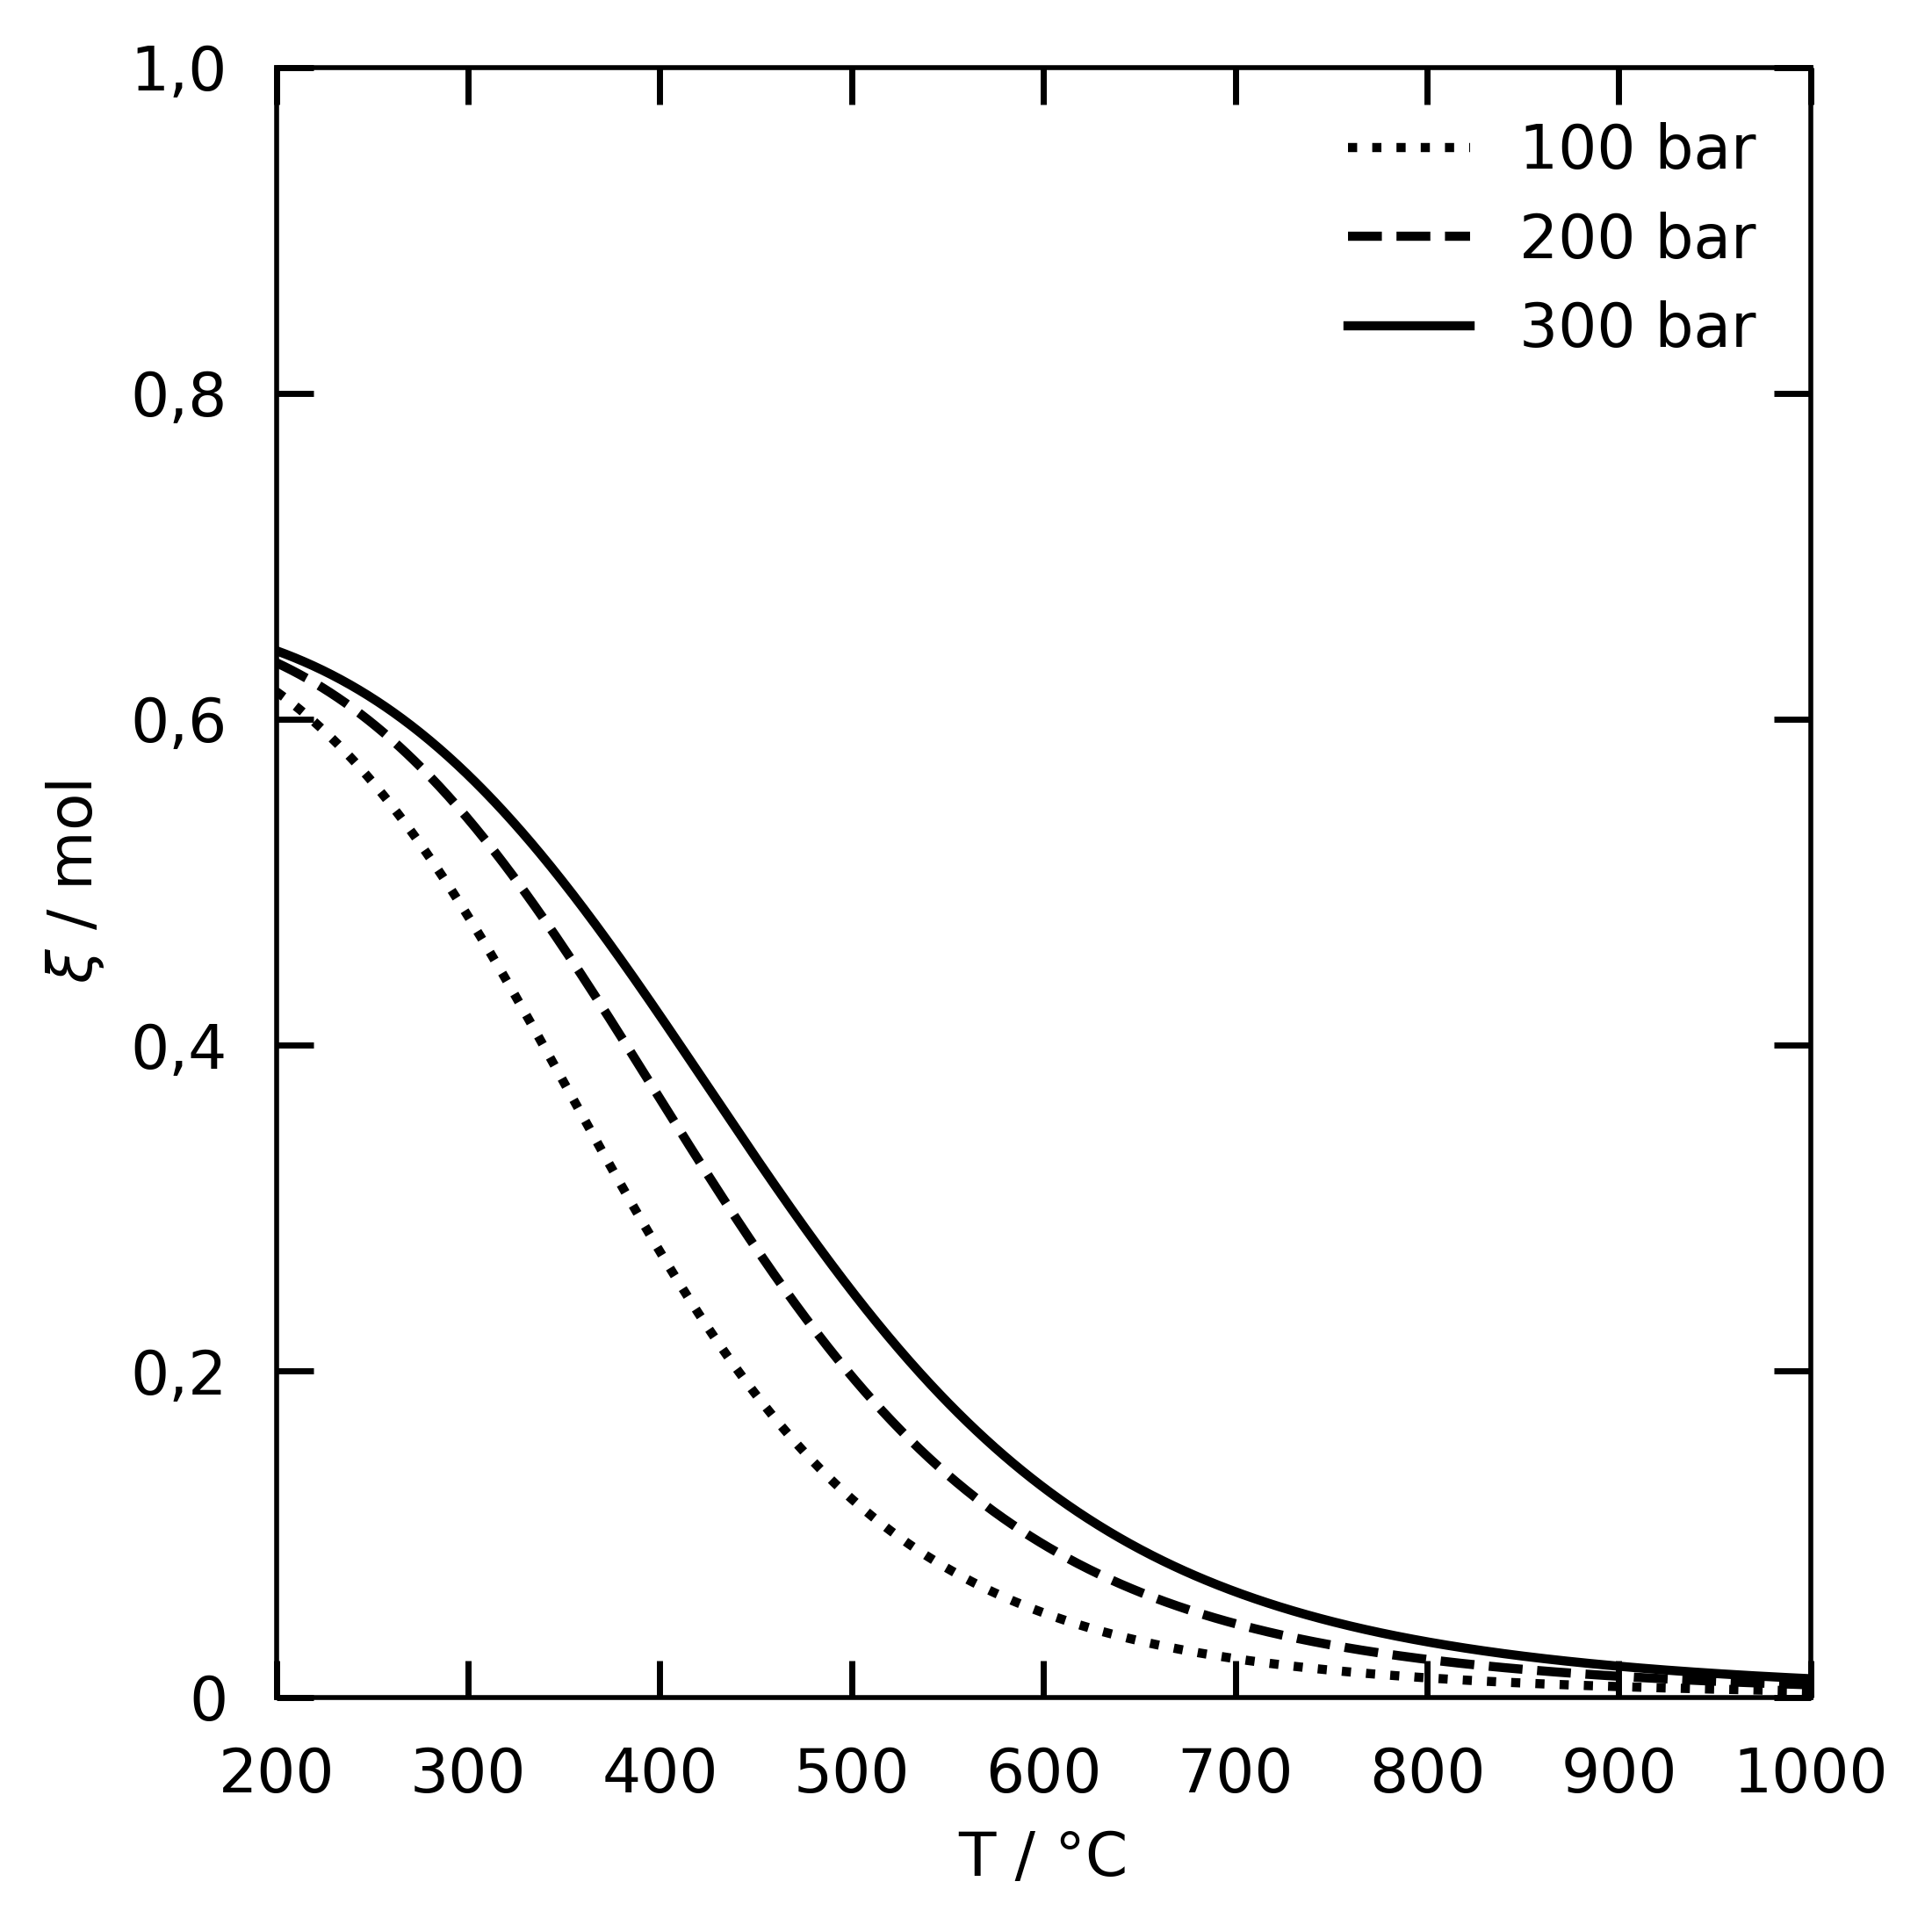

In [3]:
# Gleichgewichtskonstanten für gegebene Drücke 
Kx = [K_x(pi) for pi in p_array] 

# Berechnung der Stoffmengenanteile nach Tabelle 
n0 = np.array([1, 2, 0])                   # Stoffmengen zu Beginn
def reaction_eq(xi, n0, K):
    n_i = n0 + M[3] * xi
    n = np.sum(n_i)
    x_i = n_i/n
    return K - np.prod(x_i**M[3])          # Gl. (4.14)

# Solve-Funktion mit Startwert 0.66
def solve_xi(K_array, n0):
    xi_vals = np.zeros_like(K_array)
    for i, K in enumerate(K_array):
        xi_vals[i] = fsolve(reaction_eq, 0.66, args=(n0, K))[0]
    return xi_vals

# Berechnung der Reaktionslaufzahl 
xi = [solve_xi(K, n0) for K in Kx]

# Abbildung plotten, nähere Erklärung: siehe Abschnitt 1. 
fig, ax = plt.subplots(dpi=500, figsize=(4.5, 4.5))
for i, (xi_i, pi, ls) in enumerate(zip(xi, p_array, linestyles)):
    ax.plot(Temp - 273.15, xi_i, color='k', linestyle=ls, label=f'{pi} bar')
ax.set_xlabel('T / °C')
ax.set_ylabel(r'$\xi$ / mol')
ax.set_xlim(200, 1000)
ax.set_ylim(0, 1)
def format_with_comma(x, pos):
    if abs(x) < 0.2:
        return '0'
    return f"{x:.1f}".replace('.', ',')
ax.yaxis.set_major_formatter(FuncFormatter(format_with_comma))
ax.tick_params(direction='in', top=True, right=True, length=6, width=1)
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=8)
ax.grid(False)
ax.legend(loc='best', frameon=False)
plt.tight_layout()
plt.show()

Die Abbildung verdeutlicht, dass die Reaktionlaufzahl bei höherem Druck zunimmt, also der Umsatz der Reaktion erhöht wird. Hier kann das Prinzip von Le Chatelier zur Erklärung herangezogen werden, denn auf Produktseite liegen weniger Gasmoleküle als auf der Eduktseite vor. Weiterhin führt eine Erhöhung der Temperatur zur Verschiebung des Gleichgewichts auf die Eduktseite, da es sich bei der Ammoniaksynthese um eine exotherm ablaufende Reaktion handelt. 

# Schritt 3: Berechnung des Gleichgewichtsumsatzgrades $U(T)$

Zuletzt kann unter Verwendung von Gl. (3.19)
$$
U(T) = - \nu_1 \cdot \dfrac{\xi(T)}{n_{1,0}}
$$
der Umsatzgrad in Abhängigkeit von der Temperatur bestimmt werden. In der obigen Gleichung kennzeichnet der Index 1 dabei die stöchiometrisch begrenzene Komponente, hier also $\mathrm{H}_2$.

# Schritt 4: Berechnung der adiabatischen Temperaturdifferenz

Im Anschluss kann noch der adiabate Temperaturpfad berechnet werden, der sich ergibt, sofern die Reaktion vollständig ohne Kühlung abläuft. Damit kann nach Gl. (4.17) und (4.18) für einen Umsatzgrad von $U = 1$ die maximal auftretende Temperatur im Reaktor aufgetragen werden. Diese berechnet sich mithilfe der stöchiometrisch begrenzenen Komponente wie folgt
$$
T = T_0 + \Delta T_{\mathrm{ad}} \cdot U = T_0 + \dfrac{\Delta_{\mathrm{R}}H^{\ominus} \cdot x_{1,0}}{\nu_1 \cdot c_{\mathrm{p}}}
$$
mit $c_{\mathrm{p}}$ als mittlerer Wärmekapazität des Reaktionsgemischs. Der adiabate Reaktionspfad ermöglicht dann durch Schnittpunktbestimmung die Berechnung von $U_{\mathrm{max}}$ bei adiabater Reaktionsführung.

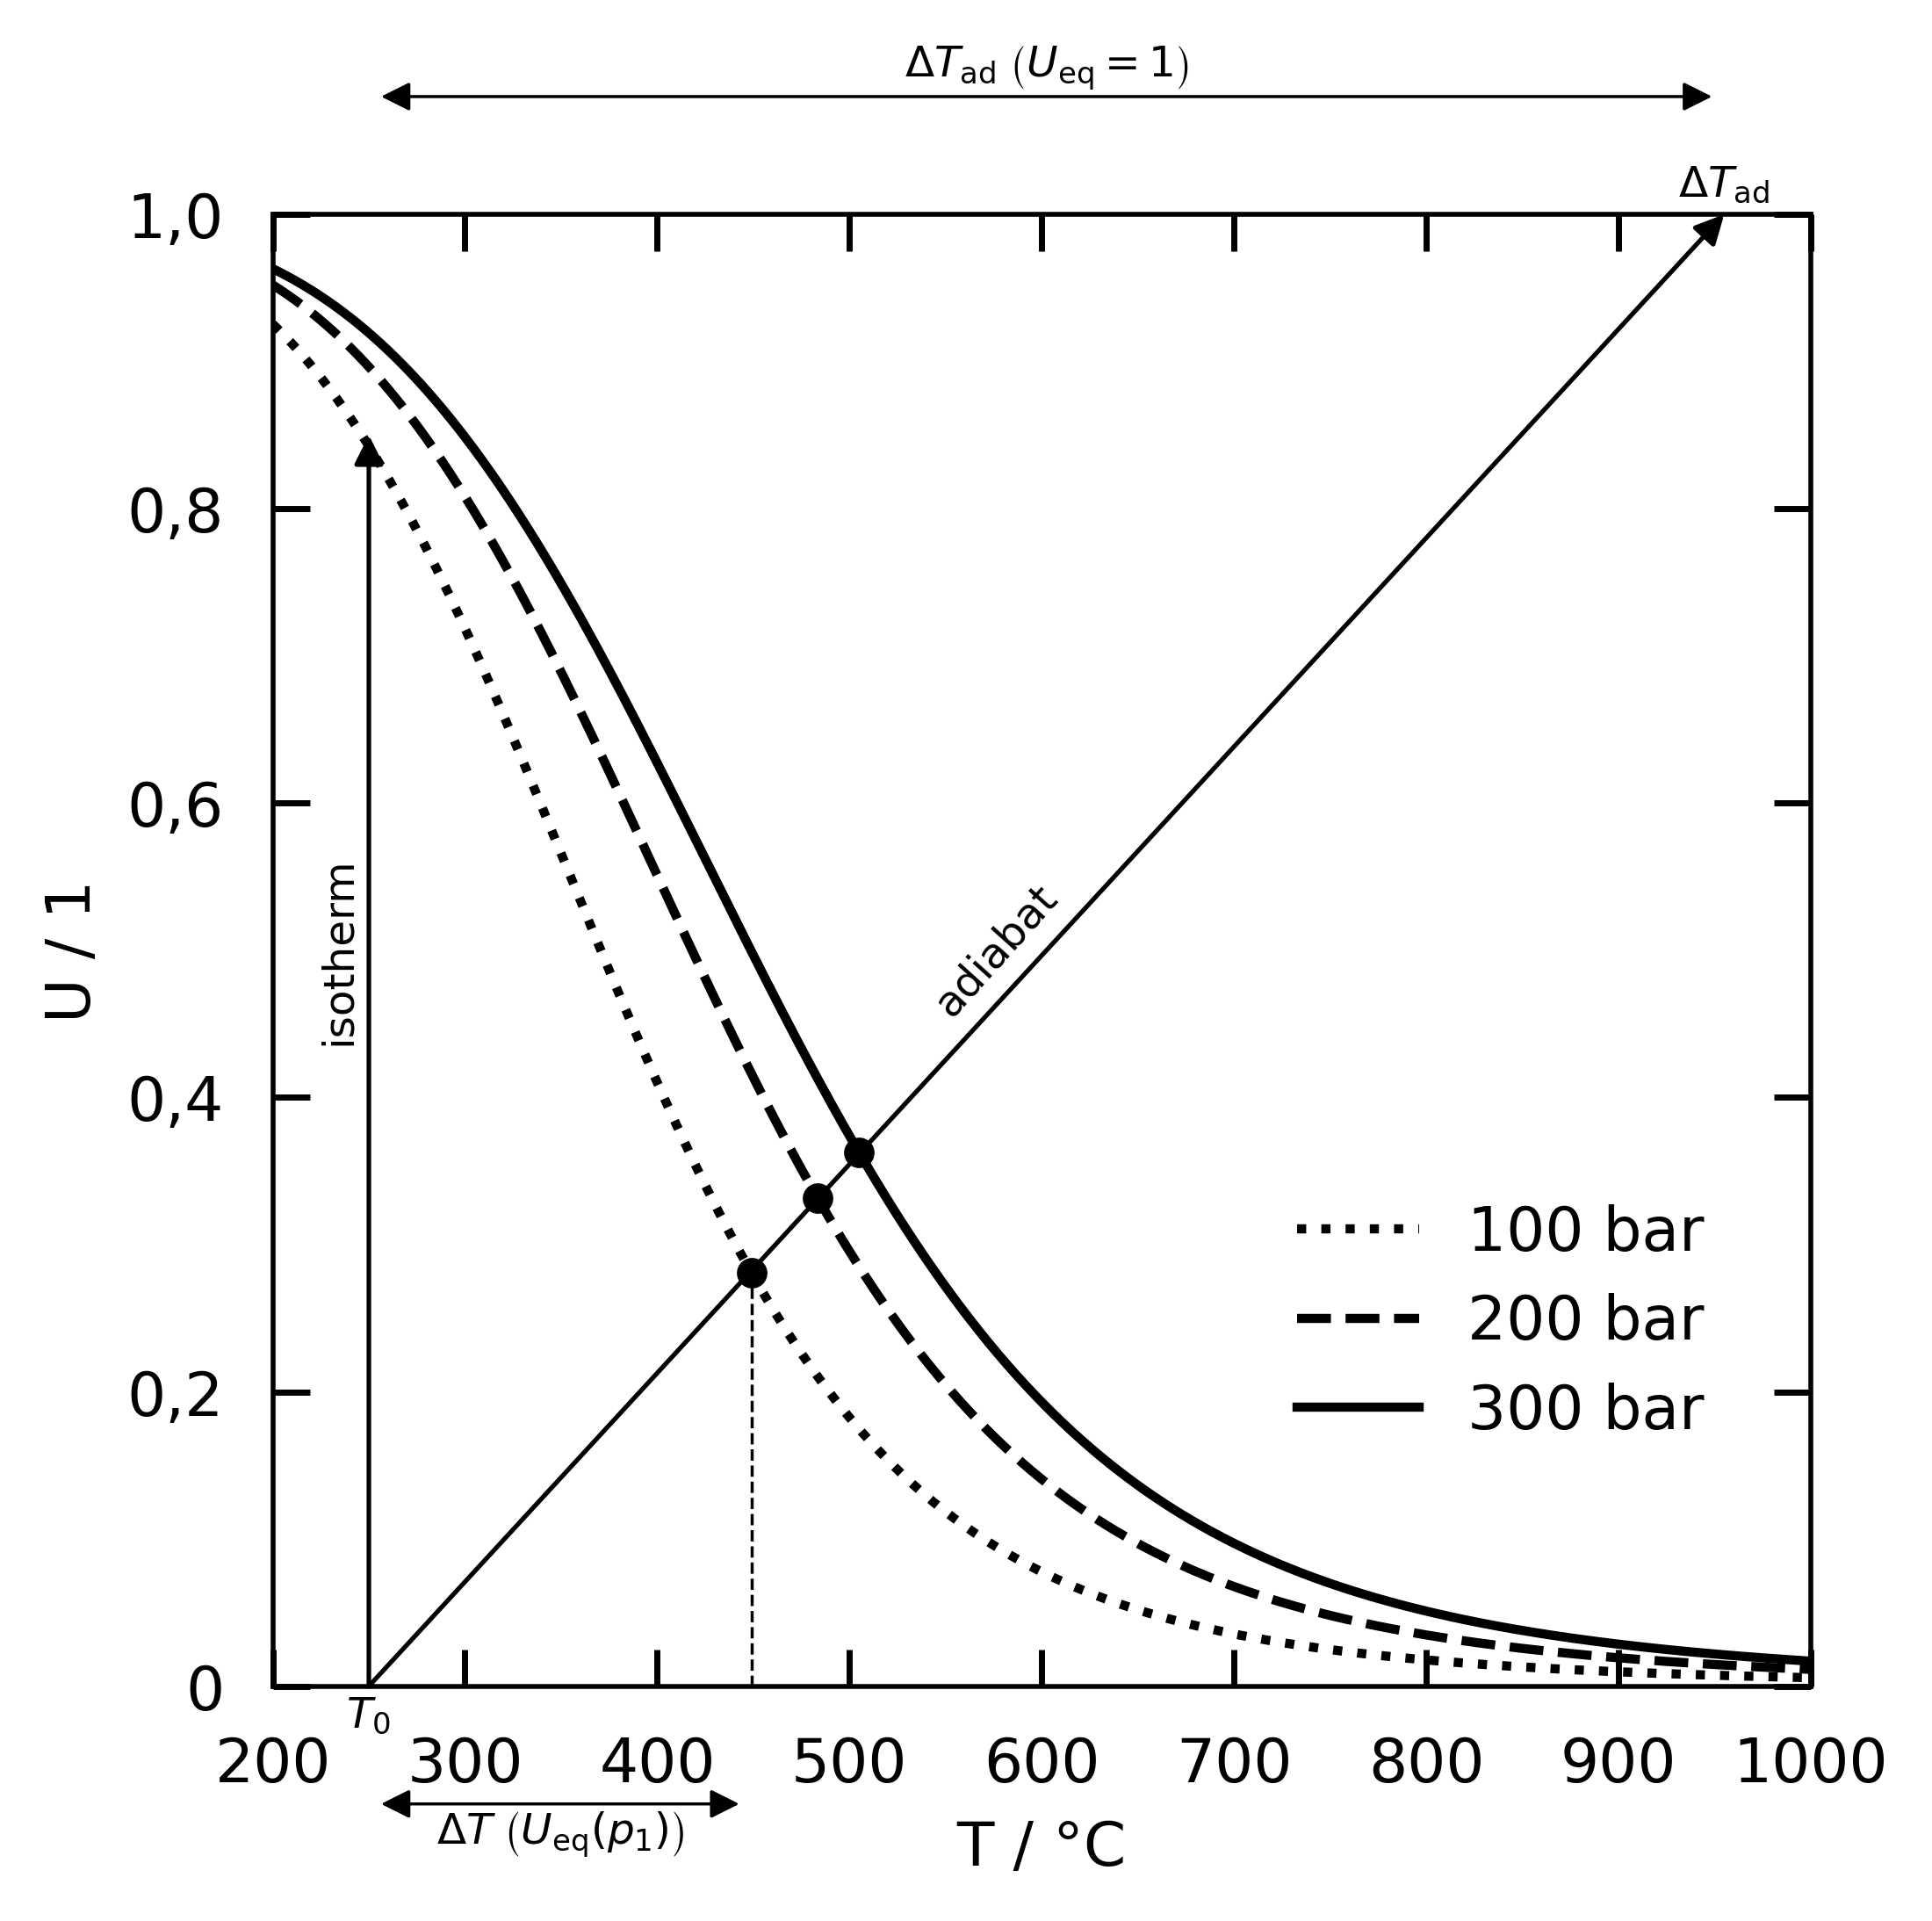

In [4]:
# Stoffmengenanteile zu Beginn der Reaktion
x0 = np.array([1/3, 2/3, 0])

# Berechnung der adiabatischen Temperaturdifferenz
# H2 begrenzt!
DeltaT_ad = (Delta_RH0 * x0[1]) / (M[3,1]*np.sum(x0 * M[2]))
T = T0 + DeltaT_ad  # in °C

# Umsatzgrade aus Reaktionslaufzahl
U = [3 * x / 2 for x in xi] 

# Geradengleichung für adiabatischen Pfad 
m = 1 / (T - T0)
b = -T0 / (T - T0)
y = m * (Temp - 273.15) + b

# Schnittpunktberechnung 
idx = [np.argmin(np.abs(Ui - y)) for Ui in U]
T_SP = [Temp[i] - 273.15 for i in idx]
U_SP = [U[i][idx[i]] for i in range(len(U))]

# Abbildung plotten, nähere Erklärung: siehe Abschnitt 1. 
fig, ax = plt.subplots(dpi=500, figsize=(4.5, 4.5))
for i, (Ui, pi, ls) in enumerate(zip(U, p_array, linestyles)):
    ax.plot(Temp - 273.15, Ui, color='k', linestyle=ls, label=f'{pi} bar')
    ax.plot(T_SP[i], U_SP[i], 'ko', markersize=4) 
ax.set_xlabel('T / °C')
ax.set_ylabel('U / 1')
ax.set_xlim(200, 1000)
ax.set_ylim(0, 1)
def format_with_comma(x, pos):
    if abs(x) < 0.2:
        return '0'
    return f"{x:.1f}".replace('.', ',')
ax.yaxis.set_major_formatter(FuncFormatter(format_with_comma))
ax.tick_params(direction='in', top=True, right=True, length=6, width=1)
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=8)
ax.grid(False)
ax.legend(loc=(0.65, 0.15), frameon=False)
# T0 und T einzeichnen
plt.text(T0, -0.02, r'$T_0$', fontsize=7, va='center', ha='center')
plt.text(T, 1.02, r'$\Delta T_{\mathrm{ad}}$', fontsize=7, va='center', ha='center')
# Pfeile einzeichnen 
from matplotlib.patches import ConnectionPatch
arrow_ad = ConnectionPatch((T0, 0), (T, 1), coordsA='data', coordsB='data',
                           arrowstyle='-|>', shrinkA=0, shrinkB=0,
                           mutation_scale=10, color='black', lw=0.75)
ax.add_artist(arrow_ad)
ax.text(540, 0.5, 'adiabat', fontsize=7, rotation=48, va='center', ha='left')

arrow_iso = ConnectionPatch((T0, 0), (T0, 0.85), coordsA='data', coordsB='data',
                            arrowstyle='-|>', shrinkA=0, shrinkB=0,
                            mutation_scale=10, color='black', lw=0.75)
ax.add_artist(arrow_iso)
ax.text(T0 - 5, 0.5, 'isotherm', fontsize=7, rotation=90, va='center', ha='right')
# Klammer zwischen T0 und erstem Schnittpunkt
trans = ax.get_xaxis_transform()
x0, x1 = T0, T_SP[0]
ax.annotate('', xy=(x0, -0.08), xytext=(x1, -0.08), xycoords=trans, textcoords=trans,
            arrowprops=dict(arrowstyle='<|-|>', lw=0.5, color='k'),
            annotation_clip=False)
ax.text((x0 + x1)/2, -0.1, r'$\Delta T\;\left(U_{\mathrm{eq}}(p_1)\right)$',
        transform=trans, fontsize=7, ha='center', va='center')
# Vertikale Linie zu erstem Schnittpunkt 
ax.vlines(T_SP[0], 0, U_SP[0], color='black', linestyle='--', linewidth=0.5)
# Klammer zwischen T0 und T 
x0, x1 = T0, T
ax.annotate('', xy=(x0, 1.08), xytext=(x1, 1.08), xycoords=trans, textcoords=trans,
            arrowprops=dict(arrowstyle='<|-|>', lw=0.5, color='k'),
            annotation_clip=False)
ax.text((x0 + x1)/2, 1.1, r'$\Delta T_{\mathrm{ad}}\;\left(U_{\mathrm{eq}} = 1\right)$',
        transform=trans, fontsize=7, ha='center', va='center')
# Platz für Klammer schaffen
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.tight_layout()
plt.show()

Auch hier zeigt sich erneut, dass ein hoher Druck sowie eine niedrige Temperatur einen hohen Umsatzgrad ermöglichen. Anhand der Abbildung kann zudem der Unterschied einer isothermen und adiabaten Temperaturführung verdeutlicht werden. Während der isotherme Betrieb einen hohen Umsatzgrad von ca. 90 % erreicht, kann bei adiabatem Betrieb nicht einmal die Hälfte der Edukte umgesetzt werden. Aufgrund der Temperaturerhöhung infolge der exothermen Reaktion wird der Umsatzgrad auf 28,3 % bei $p_1 = 100$ bar bzw. 33,2 % bei $p_2 = 200$ bar sowie 36,2 % bei $p_3 = 300$ bar begrenzt. Bei vollständigem Umsatz hingegen würde sich im Reaktor eine maximale Temperatur von ca. 955 °C einstellen, was unter realisierbaren Drücken allerdings nicht erreichbar ist, da das chemische Gleichgewicht begrenzt. Auch wenn eine niedrige Temperatur positive Einflüsse auf den Umsatzgrad hat, führt dies zu einer geringeren Reaktionsgeschwindigkeit, gleichzeitig sind damit zudem höhere Kühlkosten verbunden. 